# Data correction

In [30]:
folder = r"C:\Users\PRANAV REDDY\Desktop\MechLabProject\datasets\sound-detect"

faulty = 1
not_faulty = 0 

In [2]:
import os 
import numpy as np 
from glob import glob 
np.unique()

In [3]:
files = glob(folder + "\data\*.npz")

In [15]:
def matrix_correction(file):
    
    print(f" file : {file}")
    
    matrix = np.load(file)
    sample = matrix['samples']
    classes = matrix['classes']
    classes = classes[:, np.newaxis]
    
    print(f'''
            matrix : {sample.shape}
            classes : {classes.shape}
            uniques : {np.unique(classes, return_counts = True)}
            ''')
    
    return sample, classes 

In [16]:
matrices = []
classes = [] 
for file in files:
    s, c = matrix_correction(file)
    matrices.append(s)
    classes.append(c) 

 file : C:\Users\PRANAV REDDY\Desktop\MechLabProject\datasets\sound-detect\data\sample_1.npz

            matrix : (492, 50)
            classes : (492, 1)
            uniques : (array([0, 1]), array([337, 155], dtype=int64))
            
 file : C:\Users\PRANAV REDDY\Desktop\MechLabProject\datasets\sound-detect\data\sample_2.npz

            matrix : (326, 50)
            classes : (326, 1)
            uniques : (array([0, 1]), array([293,  33], dtype=int64))
            
 file : C:\Users\PRANAV REDDY\Desktop\MechLabProject\datasets\sound-detect\data\sample_3.npz

            matrix : (366, 50)
            classes : (366, 1)
            uniques : (array([0]), array([366], dtype=int64))
            
 file : C:\Users\PRANAV REDDY\Desktop\MechLabProject\datasets\sound-detect\data\sample_4.npz

            matrix : (752, 50)
            classes : (752, 1)
            uniques : (array([0, 1]), array([742,  10], dtype=int64))
            


In [17]:
X = np.vstack(matrices)
print(f"X shape = {X.shape}")

Y = np.vstack(classes)
print(f"Y shape = {Y.shape}")

X shape = (1936, 50)
Y shape = (1936, 1)


In [18]:
save_path = r"C:\Users\PRANAV REDDY\Desktop\MechLabProject\DATA"
if not os.path.exists(save_path):
    os.mkdir(save_path) 
    
npz_path = os.path.join(save_path, "data.npz")
np.savez(npz_path, X = X, Y = Y)

In [19]:
load_again = np.load(npz_path)
X_ = load_again['X']
Y_ = load_again['Y']

print(X_.shape, Y_.shape)

(1936, 50) (1936, 1)


# Dataset 

In [2]:
# Load file
import numpy as np 
npz_file_path = r'C:\\Users\\PRANAV REDDY\\Desktop\\MechLabProject\\DATA\\data.npz'
load = np.load(npz_file_path)
X, y = load['X'], load['Y']

In [3]:
# train - validation split 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 1)

print(f'''Dataset  info ----
        X_train = {X_train.shape}
        y_train = {y_train.shape}
        X_val = {X_val.shape}
        y_val = {y_val.shape}
        ''')

Dataset  info ----
        X_train = (1548, 50)
        y_train = (1548, 1)
        X_val = (388, 50)
        y_val = (388, 1)
        


# Model 

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
# model statements
freq_bins = 50 
model = keras.Sequential()

model.add( layers.Input(shape=(freq_bins), name = "Input_layer"))
model.add( layers.Dense(2 * freq_bins, name="Dense1") )
model.add( layers.Activation("relu", name="Relu1"))

model.add( layers.Dense((freq_bins * 3 )// 4, name ="Dense2"))
model.add( layers.Activation("relu", name = "Relu2"))

# classification
model.add(layers.Dense(1, name="binary_layer"))

# use sigmoid during prediction 
model.add(layers.Activation("sigmoid", name = "sigmoid"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 100)               5100      
_________________________________________________________________
Relu1 (Activation)           (None, 100)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 37)                3737      
_________________________________________________________________
Relu2 (Activation)           (None, 37)                0         
_________________________________________________________________
binary_layer (Dense)         (None, 1)                 38        
_________________________________________________________________
sigmoid (Activation)         (None, 1)                 0         
Total params: 8,875
Trainable params: 8,875
Non-trainable params: 0
______________________________________________________

# Training 

In [6]:
loss_fn = keras.losses.binary_crossentropy
optimizer = keras.optimizers.Adam(learning_rate=0.001) 

model.compile(optimizer = optimizer, loss = loss_fn, metrics =['accuracy'])

```python 
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
```

In [7]:
history = model.fit(x = X_train, 
                    y = y_train, 
                    batch_size = 4, 
                    epochs = 30,
                    validation_data = (X_val, y_val), 
                    validation_batch_size = None, 
                    use_multiprocessing=True, 
                    workers = 2, 
                   )

Epoch 1/30
387/387 [==============================] - 1s 1ms/step - loss: 0.3592 - accuracy: 0.8973 - val_loss: 0.3308 - val_accuracy: 0.8995
Epoch 2/30
387/387 [==============================] - 0s 891us/step - loss: 0.3202 - accuracy: 0.8966 - val_loss: 0.3112 - val_accuracy: 0.8995
Epoch 3/30
387/387 [==============================] - 0s 917us/step - loss: 0.3058 - accuracy: 0.8960 - val_loss: 0.3116 - val_accuracy: 0.8995
Epoch 4/30
387/387 [==============================] - 0s 879us/step - loss: 0.2915 - accuracy: 0.8973 - val_loss: 0.3053 - val_accuracy: 0.8840
Epoch 5/30
387/387 [==============================] - 0s 876us/step - loss: 0.2820 - accuracy: 0.8953 - val_loss: 0.2954 - val_accuracy: 0.8995
Epoch 6/30
387/387 [==============================] - 0s 887us/step - loss: 0.2735 - accuracy: 0.8979 - val_loss: 0.2777 - val_accuracy: 0.8995
Epoch 7/30
387/387 [==============================] - 0s 899us/step - loss: 0.2692 - accuracy: 0.8973 - val_loss: 0.2791 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


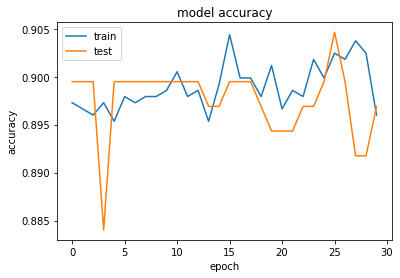

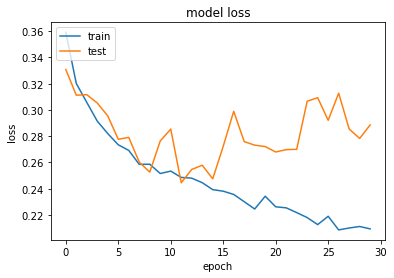

In [8]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
# model save weights 
import os 
weights_path = r'C:\Users\PRANAV REDDY\Desktop\MechLabProject\Weights'

if not os.path.exists(weights_path):
    os.mkdir(weights_path)
    
model.save_weights(filepath = weights_path) 

# Prediction 

In [7]:
# load model and weights 
weights_path = r'C:\Users\PRANAV REDDY\Desktop\MechLabProject\Weights'
model.load_weights(weights_path) 


In [8]:
from typing import Optional

import numpy as np


class AudioSegment:
    default_low_freq = 60
    default_high_freq = 5000
    default_bins = 50

    def __init__(self, data: bytes, sample_rate: int = 6000, channels: int = 1, label: Optional[int] = None):
        self.data = data
        self.audio = np.frombuffer(data, dtype=np.int16)
        self.sample_rate = sample_rate
        self.channels = channels
        self.duration = len(self.audio) / (sample_rate * channels)
        self.label = label

    def fft(self, low_freq: int = default_low_freq, high_freq: int = default_high_freq) -> np.ndarray:
        return np.absolute(np.fft.rfft(self.audio))[low_freq:high_freq]

    def spectrum(self, low_freq: int = default_low_freq, high_freq: int = default_high_freq,
                 bins: int = default_bins) -> np.ndarray:
        fft = self.fft(low_freq=low_freq, high_freq=high_freq)
        bin_size = int(len(fft) / bins)
        spect = np.array([
            np.average(fft[i * bin_size: i * bin_size + bin_size]) / (self.duration * ((1 << 16) - 1))
            for i in range(bins)
        ])
        
        return spect[np.newaxis, :]

    def plot_audio(self):
        import matplotlib.pyplot as plt
        plt.plot(self.audio)
        plt.show()

    def plot_spectrum(self, low_freq: int = default_low_freq, high_freq: int = default_high_freq,
                      bins: int = default_bins):
        import matplotlib.pyplot as plt
        spectrum = self.spectrum(low_freq=low_freq, high_freq=high_freq, bins=bins)
        plt.ylim(0, 1)
        plt.bar(range(len(spectrum)), spectrum)
        plt.show()


In [9]:
import os
import pyaudio
from tqdm import tqdm 

p = pyaudio.PyAudio()

CHUNK = 512
RECORD_SECONDS = 30
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 6000

stream = p.open(format=FORMAT,channels=CHANNELS,rate=RATE, input=True,frames_per_buffer=CHUNK)

tqdm_iter = tqdm(range(1000000))
# for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):

batch_size = 30 
batch = 0 
count = 0 
#for _ in (tqdm_iter):
for i in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        segment_object = AudioSegment(data, sample_rate=RATE, channels=CHANNELS, label=None)
        spectrum = segment_object.spectrum()
                    
 #   while count < batch_size :  
            #batch.append(spectrum)
        
        #count += 1 
    #batch = np.vstack(batch)
    
    # prediction 
        prediction = model(spectrum)#.numpy().squeeze()
        prediction = np.where(prediction < 0.5, 0, 1)
        #while count <10:
        #    batch = batch+ prediction
        #    count = count+1
        #if count ==10:
         #   if batch >= 4:
         #       print('Faulty')
         #   else:
         #       print('Not Faulty')
         #   batch =0
         #   count =0    
        if prediction == 1:
                print('Faulty')
        else:
            print('Not Faulty')
        
    
        #label = 0 if prediction < 0.5 else 1 
#     print(label)
    
#     output = f" prob : {np.round(prediction, 2)} prediction = {label}"
#     tqdm_iter.set_description(output)
    
#     count = 0 
    
stream.stop_stream()
stream.close()
p.terminate()

  0%|                                                                                      | 0/1000000 [00:00<?, ?it/s]

Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not Faulty
Not